<span style="font-family: calibre;font-size:2.5em">Objetivo </span>
<p style="font-family: calibre;font-size:1.5em"> Segmentar regiões (BR_KM) onde mais acontecem acidentes com Caminhoneiros e o nível de gravidade </p>

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math
from scipy import stats
%matplotlib inline

## 1. Import da base de acidentes tratada anteriormente.

In [73]:
df = pd.read_csv('resultados/base_acidentes_prep.csv')

In [74]:
df.head()

,br_km,ano,dia_semana,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tipo_envolvido,tracado_via,uso_solo
0,116_34,2017,domingo,colisão traseira,com vítimas feridas,plena noite,decrescente,céu claro,simples,condutor,reta,não
1,376_636,2017,domingo,saída de leito carroçável,com vítimas fatais,plena noite,crescente,garoa/chuvisco,dupla,condutor,curva,não
2,163_488,2017,domingo,saída de leito carroçável,com vítimas feridas,plena noite,decrescente,céu claro,simples,condutor,reta,sim
3,277_507,2017,domingo,saída de leito carroçável,sem vítimas,plena noite,decrescente,nublado,simples,condutor,reta,não
4,316_178,2017,domingo,colisão frontal,com vítimas fatais,plena noite,crescente,nevoeiro/neblina,simples,condutor,não informado,não


In [75]:
df = df.set_index(['br_km','ano'])

## 2. Transformando variaveis em dummies

In [76]:
df_dummies = pd.get_dummies(df)

In [77]:
df_dummies.head(2)

,,dia_semana_domingo,dia_semana_quarta-feira,dia_semana_quinta-feira,dia_semana_segunda-feira,dia_semana_sexta-feira,dia_semana_sábado,dia_semana_terça-feira,tipo_acidente_atropelamento de animal,tipo_acidente_atropelamento de pedestre,tipo_acidente_capotamento,...,tracado_via_interseção de vias,tracado_via_não informado,tracado_via_ponte,tracado_via_reta,tracado_via_retorno regulamentado,tracado_via_rotatória,tracado_via_túnel,tracado_via_viaduto,uso_solo_não,uso_solo_sim
br_km,ano,,,,,,,,,,,,,,,,,,,,,
116_34,2017,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
376_636,2017,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 3. Separação de base de Dados

In [78]:
df_dummies = df_dummies.reset_index()
a = pd.DataFrame(df_dummies['ano'].value_counts())
a  = a.reset_index()


In [79]:
a['%'] = (a['ano']/len(df))*100
col = ['ano','Qtd','%']
a.columns = col
a

,ano,Qtd,%
0,2017,56844,36.769862
1,2018,43658,28.240423
2,2019,41927,27.120716
3,2020,12165,7.868999


### 3.1 In time : Periodo de 2017 a 2018

In [80]:
df_dummies['ano'] = df_dummies['ano'].astype(int)

In [81]:
train = df_dummies[df_dummies['ano']<2019]
train = train.set_index(['br_km','ano'])

### 3.2 In time Validation: Periodo de 2019

In [82]:
valid = df_dummies[df_dummies['ano']==2019]
valid = valid.set_index(['br_km','ano'])

### 3.3 Out of time: Periodo de 2020

In [83]:
out_of = df_dummies[df_dummies['ano']==2020]
out_of = out_of.set_index(['br_km','ano'])

## 4. Encontrando Melhor número de Clusters

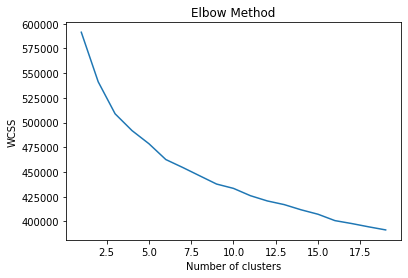

In [85]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 5. Treinando Modelo

In [86]:
kmeans = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## 6. Resultado In time

In [87]:
cluster_train = kmeans.predict(train)

## 7. Resultado In time Validation

In [88]:
cluster_valid = kmeans.predict(valid)

## 8 . Resultado Out - of - time

In [89]:
cluster_out = kmeans.predict(out_of)

## 9. Analise de Desempenho - Generalização

## 10. Junção das bases

## 11. Export da base